In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in national college costs data

data = pd.read_csv('c:/users/bourb/downloads/college_cost_by_state/nces330_20.csv')

In [3]:
# Inspect DataFrame

data.head(3)

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048


In [4]:
# Check for Nulls

data.isna().sum()

Year       0
State      0
Type       0
Length     0
Expense    0
Value      0
dtype: int64

In [5]:
# Create a new DataFrame filtering for fees/tuition at 4 year public in state schools

tuition = data[(data['Expense'] == 'Fees/Tuition') & (data['Length'] == '4-year') & (data['Type'] == 'Public In-State')]

In [6]:
# Inspect new DataFrame

tuition.head(3)

,Year,State,Type,Length,Expense,Value
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
11,2013,Alaska,Public In-State,4-year,Fees/Tuition,6317
19,2013,Arizona,Public In-State,4-year,Fees/Tuition,9694


In [7]:
# Find top 10 most expensive states by an average of the 8 years in the dataset

tuition.groupby(['State'])['Value'].mean().sort_values(ascending=False).head(10)

State
New Hampshire     15359.500
Vermont           15295.000
Pennsylvania      13807.125
Illinois          13399.250
New Jersey        13129.500
Michigan          12008.125
Massachusetts     12003.500
South Carolina    11904.750
Virginia          11869.250
Rhode Island      11640.125
Name: Value, dtype: float64

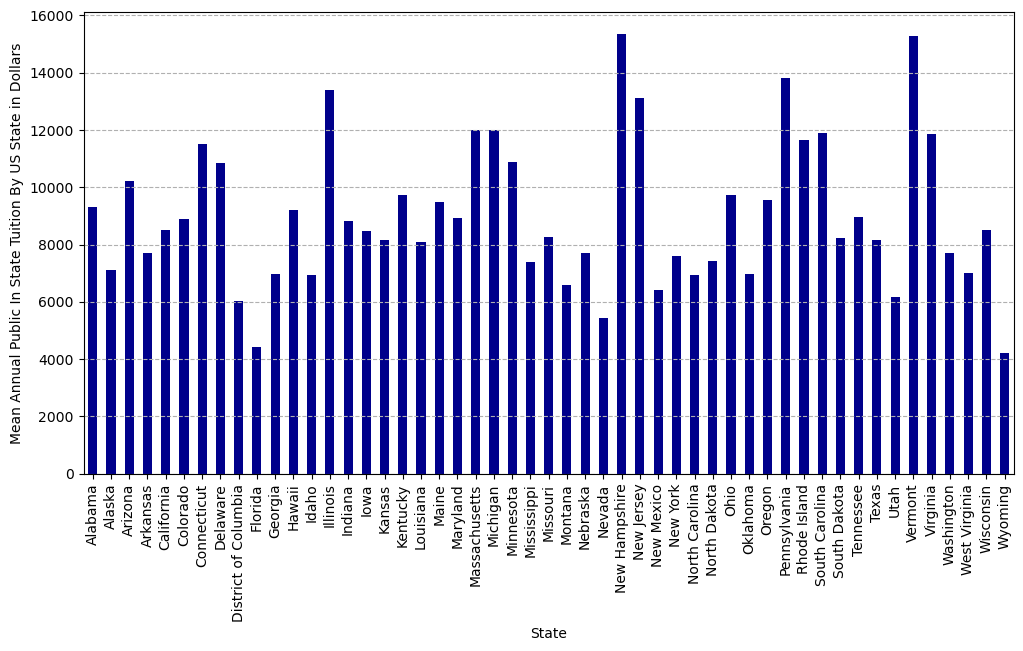

In [8]:
# Plot average tuition by state from our tuition DataFrame

tuition.groupby(['State'])['Value'].mean().plot(kind='bar', figsize=(12,6), 
                                                              ylabel='Mean Annual Public In State Tuition By US State in Dollars',
                                                              color='darkblue')
plt.grid(axis='y', linestyle='--')
plt.show()

In [9]:
# Find median tuition by year across the 50 states and DC 

tuition.groupby(['Year'])['Value'].median()

Year
2013    7815.0
2014    8216.0
2015    8441.0
2016    8504.0
2017    8489.0
2018    8766.0
2019    9225.0
2020    9144.0
Name: Value, dtype: float64

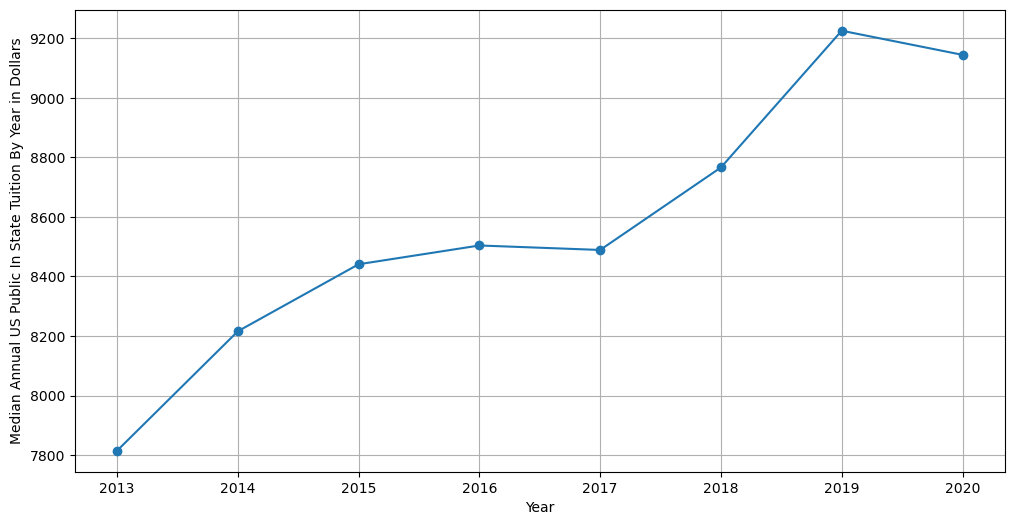

In [10]:
# Plot the data in the above Series

tuition.groupby(['Year'])['Value'].median().plot(figsize=(12,6),  
                                                 ylabel='Median Annual US Public In State Tuition By Year in Dollars', 
                                                 marker = 'o')
    
plt.grid()
plt.show()

In [11]:
# Find the top 10 median year/state combos by high cost of tuition across the dataset

tuition.groupby(['Year', 'State'])['Value'].median().sort_values(ascending=False).head(10)

Year  State        
2020  Vermont          17083.0
      New Hampshire    16679.0
2019  Vermont          16604.0
      New Hampshire    16329.0
2018  Vermont          16103.0
      New Hampshire    15949.0
2020  Pennsylvania     15565.0
2017  Vermont          15537.0
      New Hampshire    15491.0
2016  Vermont          15062.0
Name: Value, dtype: float64

In [12]:
# Illustrating you can not directly inspect a groupby object

tuition.groupby('Year')

In [13]:
# Illustrating what a groupby object looks like printed using .apply(print)
# Note the object is essentially a non-labeled collection of series 

tuition.groupby('Year')['Value'].apply(print)
    

3       8073
11      6317
19      9694
27      6604
35      8892
43      7656
51      9517
59     10929
66      7244
71      4377
79      6325
87      7731
95      5980
103    11882
111     8269
119     7832
127     6970
135     8416
143     5817
151     9295
159     8051
167    10632
175    11027
183    10291
191     6147
199     7815
207     6267
215     7023
223     4953
231    14435
239    11955
247     5483
255     6556
263     6223
271     6572
279     9301
287     5882
295     8294
303    12184
311    10817
319    10691
327     7413
335     7472
343     7402
351     5375
359    13524
367     9866
375     8856
383     5599
391     8339
398     3642
Name: 2013, dtype: int64
406     8503
414     6141
422     9906
430     6894
438     8903
446     8228
454    10128
462    11278
469     7255
474     4423
482     6614
490     8216
498     6315
506    12520
514     8443
522     7839
530     7387
538     8715
546     6585
554     9368
562     8320
570    10702
578    11295
586    10355


Year
2013    None
2014    None
2015    None
2016    None
2017    None
2018    None
2019    None
2020    None
Name: Value, dtype: object

In [14]:
# Calling .describe on a grouby object to give an idea of how to get a lay of the land 

tuition.groupby('Year')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2013,51.0,8155.039216,2353.160181,3642.0,6321.0,7815.0,9605.5,14435.0
2014,51.0,8415.607843,2373.700420,3756.0,6613.0,8216.0,10017.0,14469.0
2015,51.0,8609.705882,2451.751156,3968.0,6857.0,8441.0,10087.5,14538.0
2016,51.0,8899.274510,2527.627734,4178.0,7093.0,8504.0,10292.5,15062.0
2017,51.0,9080.843137,2582.282164,4311.0,7230.0,8489.0,10035.5,15537.0
2018,51.0,9388.960784,2693.259170,4443.0,7621.0,8766.0,10461.0,16103.0
2019,51.0,9667.843137,2779.003227,4443.0,8053.5,9225.0,10670.0,16604.0
2020,51.0,9865.450980,2891.279781,4463.0,8193.5,9144.0,11081.5,17083.0


In [15]:
# Creation of a custom DataFrame removing any rows where the expense is room/board

no_board = data[data['Expense'] != 'Room/Board']

In [16]:
# Inspect our new DataFrame

no_board.head(10)

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
5,2013,Alabama,Public Out-of-State,2-year,Fees/Tuition,7736
6,2013,Alabama,Public Out-of-State,4-year,Fees/Tuition,20380
8,2013,Alaska,Private,4-year,Fees/Tuition,21496
10,2013,Alaska,Public In-State,2-year,Fees/Tuition,3972
11,2013,Alaska,Public In-State,4-year,Fees/Tuition,6317
13,2013,Alaska,Public Out-of-State,2-year,Fees/Tuition,4150
14,2013,Alaska,Public Out-of-State,4-year,Fees/Tuition,18790


In [17]:
# Illustration of how to use .agg to create custom named columns leveraging pd.NamedAgg() to get a custom view of a groupby

no_board.groupby('State').agg(
max_tuition = pd.NamedAgg(column='Value', aggfunc='max'),
min_tuition = pd.NamedAgg(column='Value', aggfunc='min'),
mean_tuition = pd.NamedAgg(column='Value', aggfunc='mean'),
median_tuition = pd.NamedAgg(column='Value', aggfunc='median')
)

,max_tuition,min_tuition,mean_tuition,median_tuition
State,,,,
Alabama,27005,4048,12503.977273,9767.0
Alaska,26767,3340,13051.888889,13427.0
Arizona,27417,1842,11514.181818,9981.5
Arkansas,24998,2633,11302.954545,7750.5
California,38477,1225,16240.704545,8691.5
Colorado,30930,3004,14544.113636,9373.0
Connecticut,43242,3596,20090.704545,13080.5
Delaware,31809,3215,15308.705882,13193.5
District of Columbia,44692,5251,20201.884615,12560.0


In [18]:
# Very similar code to the cell above but this time grouping by year instead of state

no_board.groupby('Year').agg(
max_tuition = pd.NamedAgg(column='Value', aggfunc='max'),
min_tuition = pd.NamedAgg(column='Value', aggfunc='min'),
mean_tuition = pd.NamedAgg(column='Value', aggfunc='mean'),
median_tuition = pd.NamedAgg(column='Value', aggfunc='median')
)

,max_tuition,min_tuition,mean_tuition,median_tuition
Year,,,,
2013,36795,1225,12630.671937,9034.0
2014,38009,1233,13087.600791,9362.0
2015,39298,1244,13481.233202,9189.0
2016,40761,1246,13991.565217,9490.0
2017,42655,1262,14512.601594,9827.0
2018,44384,1268,15096.673387,10358.5
2019,46016,1271,15642.439024,10636.5
2020,47980,1270,16046.873984,10980.0
2021,49152,1285,17857.338462,13640.0


In [19]:
# Creation of 5 lists of states within a region. Used to create a custom region column in original DataFrame

northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey',
             'Pennsylvania', 'District of Columbia']

southeast = ['Florida', 'Georgia', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Tennessee', 'Kentucky', 'North Carolina',
             'South Carolina', 'Virginia', 'West Virginia', 'Maryland', 'Delaware']

midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Minnesota', 'Iowa', 'Kansas', 'Missouri', 'Nebraska',
           'North Dakota', 'South Dakota']

southwest = ['Arizona', 'New Mexico', 'Oklahoma', 'Texas']

west = ['California', 'Oregon', 'Washington', 'Nevada', 'Utah', 'Colorado', 'Wyoming', 'Montana', 'Idaho', 'Alaska', 'Hawaii']

In [20]:
# Creation of a function to assign a region to a state using the above lists

def states_to_regions(df):
    if df['State'] in northeast:
        return 'Northeast'
    elif df['State'] in southeast:
        return 'Southeast'
    elif df['State'] in midwest:
        return 'Midwest'
    elif df['State'] in southwest:
        return 'Southwest'
    elif df['State'] in west:
        return 'West'

In [23]:
# Create a new column in the Dataframe using region values returned from the function

data['Region'] = data.apply(lambda row: states_to_regions(row), axis=1)

In [24]:
data.head(5)

,Year,State,Type,Length,Expense,Value,Region
0,2013,Alabama,Private,4-year,Fees/Tuition,13983,Southeast
1,2013,Alabama,Private,4-year,Room/Board,8503,Southeast
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048,Southeast
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073,Southeast
4,2013,Alabama,Public In-State,4-year,Room/Board,8473,Southeast


In [25]:
# Sanity testing to make sure all rows were assigned to one of the five regions 

data['Region'].unique() 

array(['Southeast', 'West', 'Southwest', 'Northeast', 'Midwest'],
      dtype=object)

In [26]:
# Counts the values within each division of the groupby

data.groupby('Region').count()

,Year,State,Type,Length,Expense,Value
Region,,,,,,
Midwest,852,852,852,852,852,852
Northeast,674,674,674,674,674,674
Southeast,984,984,984,984,984,984
Southwest,284,284,284,284,284,284
West,754,754,754,754,754,754


In [27]:
# Finds the median cost of a college education of any type across the years within a particular region

data.groupby('Region')['Value'].median()

Region
Midwest       9336.0
Northeast    12817.5
Southeast    10006.5
Southwest     9304.0
West          9820.0
Name: Value, dtype: float64